In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import scipy.optimize as sco

In [2]:
# Cargar el archivo Excel
file_path_assets = "assets.xlsx"
file_path_paraguay = "indices_YTM.xlsx"

# Leer el archivo Excel
assets = pd.read_excel(file_path_assets)
paraguay_bonds = pd.read_excel(file_path_paraguay)
paraguay_bonds['Paraguay bonds 2044'] = paraguay_bonds['Paraguay bonds 2044'] / 100
mean_paraguay = paraguay_bonds['Paraguay bonds 2044'].mean()
std_paraguay = paraguay_bonds['Paraguay bonds 2044'].std()


In [3]:
# Reemplazar el valor en la matriz donde Asset es "PV (Liabilities)"
assets.loc[assets["Asset"] == "PV (Liabilities)", "10 year"] = mean_paraguay
assets.loc[assets["Asset"] == "PV (Liabilities)", "Volatility"] = std_paraguay
assets.loc[assets["Asset"] == "Paraguay Bonds 2044", "10 year"] = mean_paraguay
assets.loc[assets["Asset"] == "Paraguay Bonds 2044", "Volatility"] = std_paraguay
assets

,Currency,Asset class,Asset,Index,10 year,Volatility
0,USD,Equities,US large cap equities,MSCI USA Index,0.056899,0.179860
1,USD,Equities,Emerging large cap equities,MSCI Emerging Markets Index,0.087351,0.215077
2,USD,Equities,Global ex US large cap equities,MSCI World ex-US Index,0.088604,0.172595
3,USD,Fixed income,US Corporate debt,Bloomberg Barclays U.S. Credit Index,0.046309,0.060933
4,USD,Fixed income,US Sovereign debt,Bloomberg Barclays Government Index,0.044060,0.049520
5,USD,Fixed income,USD Sovereign Emerging debt,JP Morgan EMBI Global Diversified Index,0.057100,0.091829
6,USD,Fixed income,Global Sovereign debt ex US,Bloomberg Barclays Global Aggregate Treasury I...,0.044179,0.032667
7,USD,Private markets,Paraguay Bonds 2044,Paraguay Bonds 2044,0.056286,0.008762
8,USD,Private markets,PV (Liabilities),PV (Liabilities),0.056286,0.008762


In [447]:

# Definir el número de simulaciones por activo
num_simulations = 120

# Crear una estructura para almacenar los resultados
montecarlo_returns = {}

# Generar las simulaciones para cada activo
for index, row in assets.iterrows():
    asset_name = row["Asset"]
    mean_return = row["10 year"]
    volatility = row["Volatility"]

    # Simulación de Monte Carlo con distribución normal
    simulated_data = np.random.normal(loc=mean_return, scale=volatility, size=num_simulations)
    
    # Guardar los resultados
    montecarlo_returns[asset_name] = simulated_data

# Convertir los resultados en un DataFrame
returns = pd.DataFrame(montecarlo_returns)

returns ["PV (Liabilities)"] = returns["Paraguay Bonds 2044"]
returns

,US large cap equities,Emerging large cap equities,Global ex US large cap equities,US Corporate debt,US Sovereign debt,USD Sovereign Emerging debt,Global Sovereign debt ex US,Paraguay Bonds 2044,PV (Liabilities)
0,-0.044388,0.105914,0.329404,0.020977,0.002635,0.190655,0.117522,0.051715,0.051715
1,0.367908,0.276016,0.111824,-0.116476,0.030375,0.035490,0.054564,0.067471,0.067471
2,0.033715,0.195728,0.271259,0.063876,0.109462,0.067533,0.032839,0.040769,0.040769
3,0.137358,0.049499,0.276636,0.129637,0.051099,-0.030535,0.071617,0.040374,0.040374
4,0.126973,-0.229803,-0.191770,0.003568,-0.043544,-0.032300,0.017377,0.050774,0.050774
...,...,...,...,...,...,...,...,...,...
115,-0.084422,0.166578,0.119362,0.069673,-0.005449,0.042157,0.046940,0.061878,0.061878
116,0.396218,-0.244163,0.298991,0.192727,0.093856,0.235234,-0.015143,0.054184,0.054184
117,0.041365,0.015539,0.045593,0.012381,0.041898,0.227737,0.021524,0.056095,0.056095
118,0.338632,0.111041,0.099723,-0.027923,-0.018730,-0.010781,0.014810,0.049561,0.049561


In [448]:
asset_liablity_names = assets['Asset'].values
asset_liability_volatilities = assets['Volatility'].values
asset_liablity_expected_returns = assets['10 year'].values

asset_names = asset_liablity_names[:-1]
liablity_names = asset_liablity_names[-1]

asset_volatility = asset_liability_volatilities[:-1]
liability_volatility = asset_liability_volatilities[-1]

asset_expected_returns = asset_liablity_expected_returns[:-1]
liability_return = asset_liablity_expected_returns[-1]

In [449]:
returns.corr()


,US large cap equities,Emerging large cap equities,Global ex US large cap equities,US Corporate debt,US Sovereign debt,USD Sovereign Emerging debt,Global Sovereign debt ex US,Paraguay Bonds 2044,PV (Liabilities)
US large cap equities,1.000000,-0.086544,-0.125050,0.084617,-0.070214,0.067493,0.068610,-0.019422,-0.019422
Emerging large cap equities,-0.086544,1.000000,-0.041888,-0.084090,0.007496,0.020948,0.085303,0.035829,0.035829
Global ex US large cap equities,-0.125050,-0.041888,1.000000,0.078328,0.213671,-0.104470,-0.043541,0.046595,0.046595
US Corporate debt,0.084617,-0.084090,0.078328,1.000000,-0.059752,-0.015683,0.043289,-0.141104,-0.141104
US Sovereign debt,-0.070214,0.007496,0.213671,-0.059752,1.000000,-0.056881,-0.127530,0.237077,0.237077
USD Sovereign Emerging debt,0.067493,0.020948,-0.104470,-0.015683,-0.056881,1.000000,-0.163099,-0.077655,-0.077655
Global Sovereign debt ex US,0.068610,0.085303,-0.043541,0.043289,-0.127530,-0.163099,1.000000,-0.226198,-0.226198
Paraguay Bonds 2044,-0.019422,0.035829,0.046595,-0.141104,0.237077,-0.077655,-0.226198,1.000000,1.000000
PV (Liabilities),-0.019422,0.035829,0.046595,-0.141104,0.237077,-0.077655,-0.226198,1.000000,1.000000


In [450]:
# Calcular la matriz de correlación
correlation_matrix = returns.corr().values

asset_correlation_matrix = correlation_matrix[:-1, :-1]

In [451]:

# Pesos de la cartera
weights = np.array([1, 0, 0, 0, 0, 0, 0, 0])

# Matriz de correlaciones de assets
asset_correlation_matrix = correlation_matrix[:-1, :-1]

# Matriz de varianzas y covarianzas
cov_matrix = np.outer(asset_liability_volatilities, asset_liability_volatilities) * correlation_matrix

# Matriz de correlaciones de assets
asset_cov_matrix = cov_matrix[:-1, :-1]



# Cálculo del retorno esperado del portafolio
expected_portfolio_return = np.dot(weights, asset_expected_returns)

# Cálculo del rendimiento esperado del superávit
surplus_expected_return = expected_portfolio_return - liability_return

# Cálculo de la varianza del portafolio de activos
portfolio_variance = np.dot(weights.T, np.dot(asset_cov_matrix, weights))

# Varianza del pasivo
liability_variance = liability_volatility ** 2

# Covarianza Activos-Pasivo
cov_assets_liability = np.dot(weights, cov_matrix[:-1, -1])

# Varianza del superávit
surplus_variance = portfolio_variance + liability_variance - 2 * cov_assets_liability

# Desviación estándar del superávit
surplus_std_dev = np.sqrt(surplus_variance)

# Resultados
portfolio_stats = {
    "Expected Portfolio Return": expected_portfolio_return,
    "Portfolio Variance": portfolio_variance,
    "Liability Variance": liability_variance,
    "Covariance Assets-Liability": cov_assets_liability,
    "Surplus Variance": surplus_variance,
    "Surplus Standard Deviation": surplus_std_dev,
    "Surplus Expected Return": surplus_expected_return
}

# Convertir los resultados en DataFrames para visualización
df_portfolio_stats = pd.DataFrame(list(portfolio_stats.items()), columns=["Metric", "Value"])
df_portfolio_stats

,Metric,Value
0,Expected Portfolio Return,0.056899
1,Portfolio Variance,0.032350
2,Liability Variance,0.000077
3,Covariance Assets-Liability,-0.000031
4,Surplus Variance,0.032488
5,Surplus Standard Deviation,0.180244
6,Surplus Expected Return,0.000613


In [463]:
# Datos iniciales
A0 = 1.874  # Activos en billones
L0 = 5.805  # Pasivos en billones

# Superávit inicial
S0 = A0 - L0

# Cálculo del valor de los activos y pasivos en t=1
A1 = A0 * (1 + expected_portfolio_return)
L1 = L0 * (1 + liability_return)

# Superávit en t=1
S1 = A1 - L1

# Tabla estructurada
usd_billions_table = {
    "": ["t=0", "t=1"],
    "Assets": [A0, A1],
    "Liability": [L0, L1],
    "Surplus": [S0, S1],
    "Surplus Std Dev": [0, surplus_std_dev * S1]
}

# Convertir a DataFrame
usd_billions_table = pd.DataFrame(usd_billions_table)

usd_billions_table

,,Assets,Liability,Surplus,Surplus Std Dev
0,t=0,1.874000,5.80500,-3.931000,0.000000
1,t=1,1.980629,6.13174,-4.151111,-0.748211


In [453]:
# Definir la función para calcular el surplus expected return
def surplus_expected_return(weights):
    expected_portfolio_return = np.dot(weights, asset_expected_returns)
    return expected_portfolio_return - liability_return  # Se ajusta para mantener consistencia

# Función objetivo: minimizar la desviación estándar del superávit
def surplus_risk(weights):
    portfolio_variance = np.dot(weights.T, np.dot(asset_cov_matrix, weights))
    cov_assets_liability = np.dot(weights, cov_matrix[:-1, -1])
    surplus_variance = portfolio_variance + liability_variance - 2 * cov_assets_liability
    return np.sqrt(surplus_variance)

# Definir restricciones y límites
num_assets = len(asset_expected_returns)
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
bounds = [(0, 1) for _ in range(num_assets)]

# Definir puntos en la frontera eficiente del surplus return
target_surplus_returns = np.linspace(min(asset_expected_returns) - liability_return, 
                                     max(asset_expected_returns) - liability_return, 40)
# Corrección: reiniciar correctamente las listas antes de optimizar
optimal_weights = []
results = []

for target in target_surplus_returns:
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
                   {'type': 'eq', 'fun': lambda w: surplus_expected_return(w) - target})
    
    result = sco.minimize(surplus_risk, num_assets * [1. / num_assets], method='SLSQP',
                          bounds=bounds, constraints=constraints)
    
    if result.success:
        weights_optimal = result.x
        asset_expected_return = np.dot(weights_optimal, asset_expected_returns)
        asset_t1 = A0 * (1 + asset_expected_return)
        liability_t1 = L0 * (1 + liability_return)
        surplus_t1 = asset_t1 - liability_t1
        
        portfolio_variance = np.dot(weights_optimal.T, np.dot(asset_cov_matrix, weights_optimal))
        cov_assets_liability = np.dot(weights_optimal, cov_matrix[:-1, -1])
        surplus_variance = portfolio_variance + liability_variance - 2 * cov_assets_liability

        surplus_std_dev_t1 = np.sqrt(abs(surplus_variance)) * abs(surplus_t1)
        
        results.append([target, surplus_risk(weights_optimal), asset_expected_return, 
                        liability_return, asset_t1, liability_t1, 
                        surplus_t1, surplus_std_dev_t1])
        
        optimal_weights.append(weights_optimal)
    else:
        results.append([target, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan])
        optimal_weights.append([np.nan]*num_assets)

# Convertir resultados en DataFrame
df_surplus_analysis_with_weights = pd.DataFrame(results, columns=[
    "Surplus Expected Return", "Surplus Risk", "Asset Expected Return", 
    "Liability Expected Return", "Asset (t+1)", "Liability (t+1)", 
    "Surplus (t+1)", "Surplus Std Dev (t+1)"
])

# Añadir pesos óptimos al DataFrame
for idx, asset in enumerate(asset_names):
    df_surplus_analysis_with_weights[f'Weight_{asset}'] = [w[idx] for w in optimal_weights]

df_surplus_analysis_with_weights.head()


,Surplus Expected Return,Surplus Risk,Asset Expected Return,Liability Expected Return,Asset (t+1),Liability (t+1),Surplus (t+1),Surplus Std Dev (t+1),Weight_US large cap equities,Weight_Emerging large cap equities,Weight_Global ex US large cap equities,Weight_US Corporate debt,Weight_US Sovereign debt,Weight_USD Sovereign Emerging debt,Weight_Global Sovereign debt ex US,Weight_Paraguay Bonds 2044
0,-0.012226,0.048200,0.044060,0.056286,1.957612,6.130683,-4.173071,0.201143,2.344705e-15,0.000000e+00,2.668727e-16,0.000000,1.000000,0.000000,3.860313e-11,8.511541e-16
1,-0.011084,0.023941,0.045202,0.056286,1.959754,6.130683,-4.170929,0.099855,3.773426e-18,4.329234e-18,1.424939e-18,0.099688,0.317551,0.017458,5.138237e-01,5.147946e-02
2,-0.009942,0.021474,0.046344,0.056286,1.961896,6.130683,-4.168788,0.089519,5.136533e-18,0.000000e+00,6.780547e-18,0.091379,0.284358,0.018505,4.599227e-01,1.458347e-01
3,-0.008799,0.019007,0.047486,0.056286,1.964037,6.130683,-4.166646,0.079196,6.133174e-19,1.016369e-17,0.000000e+00,0.078012,0.253187,0.016204,4.079230e-01,2.446735e-01
4,-0.007657,0.016539,0.048629,0.056286,1.966179,6.130683,-4.164505,0.068877,2.984250e-18,2.004735e-17,0.000000e+00,0.070388,0.218360,0.012685,3.548000e-01,3.437661e-01


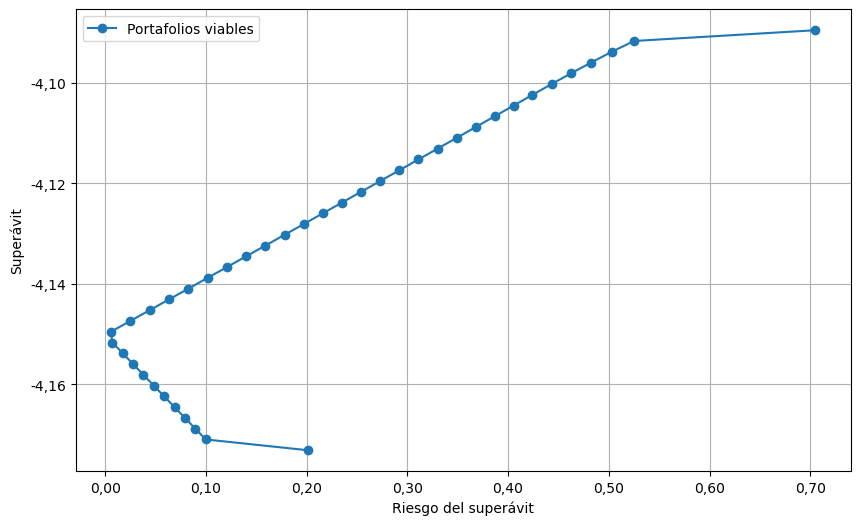

In [487]:
# Graficar Surplus (t+1) vs. Surplus Std Dev (t+1)
plt.figure(figsize=(10, 6))
plt.plot(df_surplus_analysis_with_weights["Surplus Std Dev (t+1)"], df_surplus_analysis_with_weights["Surplus (t+1)"], 
         marker='o', linestyle='-', label="Portafolios viables")

plt.xlabel("Riesgo del superávit")
plt.ylabel("Superávit")
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.2f}".replace('.', ',')))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.2f}".replace('.', ',')))


plt.grid(True)
plt.legend()
plt.show()


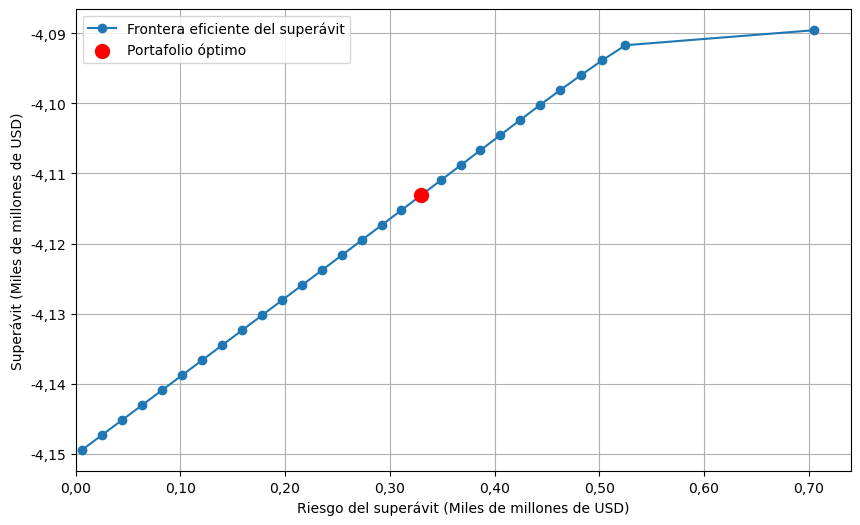

In [547]:
# Encontrar el punto mínimo de la curva (vértice de la parábola)
min_surplus_risk_index = df_surplus_analysis_with_weights["Surplus Std Dev (t+1)"].idxmin()

# Filtrar los datos manteniendo solo los puntos por encima del vértice
df_filtered_surplus_analysis = df_surplus_analysis_with_weights.loc[min_surplus_risk_index:].reset_index(drop=True)

# Definir el coeficiente de aversión al riesgo
lambda_risk_aversion = 3  # Ajustable según el perfil de riesgo

# Calcular la utilidad esperada del superávit para cada punto en la frontera eficiente
df_filtered_surplus_analysis["Utility"] = (
    df_filtered_surplus_analysis["Surplus Expected Return"] -
    0.5 * lambda_risk_aversion * df_filtered_surplus_analysis["Surplus Risk"]**2
)

# Encontrar el portafolio óptimo como el que maximiza la utilidad
optimal_index = df_filtered_surplus_analysis["Utility"].idxmax()
optimal_surplus_portfolio = df_filtered_surplus_analysis.loc[optimal_index]

# Graficar la frontera eficiente con el portafolio óptimo resaltado
plt.figure(figsize=(10, 6))
plt.plot(df_filtered_surplus_analysis["Surplus Std Dev (t+1)"], df_filtered_surplus_analysis["Surplus (t+1)"], 
         marker='o', linestyle='-', label="Frontera eficiente del superávit")

# Marcar el portafolio óptimo
plt.scatter(optimal_surplus_portfolio["Surplus Std Dev (t+1)"], 
            optimal_surplus_portfolio["Surplus (t+1)"], 
            color='red', label="Portafolio óptimo", zorder=3, s=100)

plt.xlabel("Riesgo del superávit (Miles de millones de USD)")
plt.ylabel("Superávit (Miles de millones de USD)")
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.2f}".replace('.', ',')))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.2f}".replace('.', ',')))

plt.grid(True)
plt.legend()
plt.xlim(left=0)  # Asegurar que el eje X comienza en 0
plt.show()


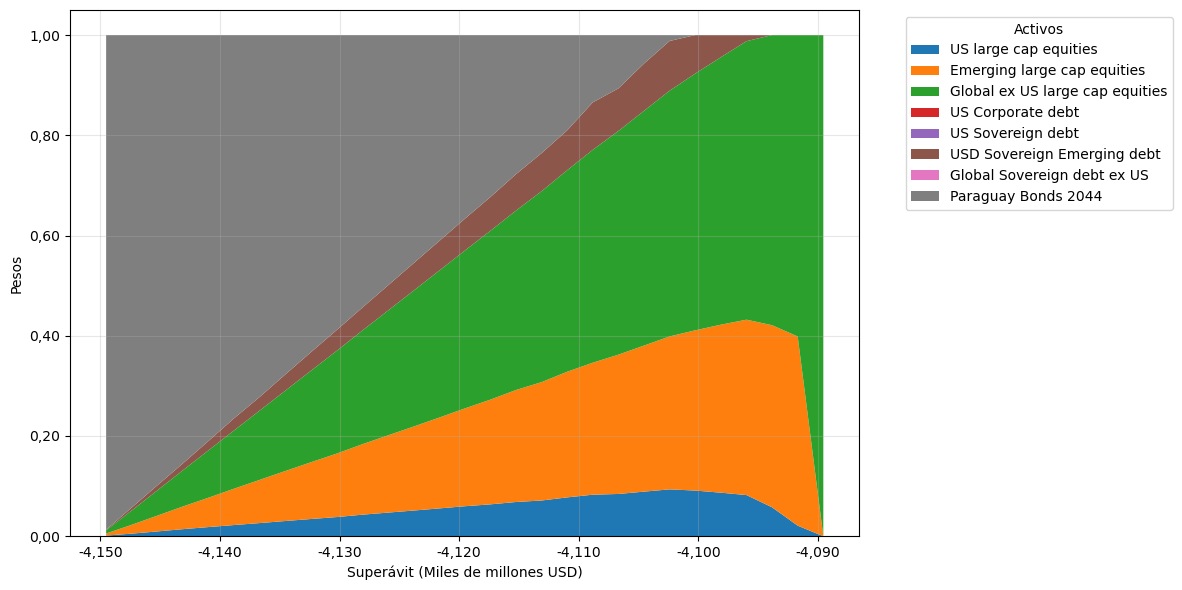

In [536]:
# Modificar el gráfico para utilizar "Surplus (t+1)" en el eje X en lugar de "Surplus Expected Return"

# Seleccionar las columnas con los pesos de los activos
weights_columns = [col for col in df_filtered_surplus_analysis.columns if col.startswith('Weight_')]

# Preparar datos correctamente como arrays numéricos
x = df_filtered_surplus_analysis['Surplus (t+1)'].values.astype(float)
y = df_filtered_surplus_analysis[weights_columns].values.astype(float).T

# Crear gráfico de área
plt.figure(figsize=(12, 6))
plt.stackplot(x, y, labels=[col.replace('Weight_', '') for col in weights_columns])

plt.xlabel('Superávit (Miles de millones USD)')
plt.ylabel('Pesos')

plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.3f}".replace('.', ',')))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.2f}".replace('.', ',')))

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Activos")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Mean Variance Optimization ###

In [537]:
# Función objetivo para la optimización de media-varianza
def portfolio_risk(weights):
    return np.sqrt(np.dot(weights.T, np.dot(asset_cov_matrix, weights)))

# Definir puntos en la frontera eficiente de media-varianza
target_returns = np.linspace(min(asset_expected_returns), max(asset_expected_returns), 40)
# Modificación para almacenar los pesos óptimos en cada punto de la frontera eficiente media-varianza
mean_variance_results = []
optimal_mv_weights = []

for target in target_returns:
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
                   {'type': 'eq', 'fun': lambda w: np.dot(w, asset_expected_returns) - target})
    
    result = sco.minimize(portfolio_risk, num_assets * [1. / num_assets], method='SLSQP',
                          bounds=bounds, constraints=constraints)
    
    if result.success:
        weights_optimal = result.x
        asset_expected_return_opt = np.dot(weights_optimal, asset_expected_returns)
        asset_t1 = A0 * (1 + asset_expected_return_opt)
        
        portfolio_variance = np.dot(weights_optimal.T, np.dot(asset_cov_matrix, weights_optimal))
        portfolio_std_dev_t1 = np.sqrt(portfolio_variance) * asset_t1
        
        mean_variance_results.append([target, portfolio_risk(weights_optimal), asset_expected_return_opt,
                                      asset_t1, portfolio_std_dev_t1])
        
        optimal_mv_weights.append(weights_optimal)
    else:
        mean_variance_results.append([target, np.nan, np.nan, np.nan, np.nan])
        optimal_mv_weights.append([np.nan]*num_assets)

# Crear DataFrame con los resultados
df_mean_variance_analysis_weights = pd.DataFrame(mean_variance_results, columns=[
    "Target Return", "Portfolio Risk", "Asset Expected Return", 
    "Asset (t+1)", "Portfolio Std Dev (t+1)"
])

# Añadir los pesos óptimos al DataFrame
for idx, asset in enumerate(asset_names):
    df_mean_variance_analysis_weights[f'Weight_{asset}'] = [w[idx] for w in optimal_mv_weights]

df_mean_variance_analysis_weights.head()



,Target Return,Portfolio Risk,Asset Expected Return,Asset (t+1),Portfolio Std Dev (t+1),Weight_US large cap equities,Weight_Emerging large cap equities,Weight_Global ex US large cap equities,Weight_US Corporate debt,Weight_US Sovereign debt,Weight_USD Sovereign Emerging debt,Weight_Global Sovereign debt ex US,Weight_Paraguay Bonds 2044
0,0.044060,0.049520,0.044060,1.956568,0.096889,0.000000e+00,2.099413e-11,0.000000e+00,1.093618e-11,1.000000,1.405884e-11,0.000000,1.200084e-11
1,0.045202,0.021782,0.045202,1.958709,0.042664,0.000000e+00,0.000000e+00,9.907950e-18,1.145523e-01,0.272631,3.320012e-02,0.547994,3.162283e-02
2,0.046344,0.019477,0.046344,1.960849,0.038191,0.000000e+00,0.000000e+00,1.911767e-17,1.074677e-01,0.238618,3.400558e-02,0.493896,1.260131e-01
3,0.047486,0.017218,0.047486,1.962990,0.033800,9.199761e-19,1.720541e-17,0.000000e+00,9.389822e-02,0.207061,3.253106e-02,0.442508,2.240018e-01
4,0.048629,0.015025,0.048629,1.965130,0.029526,4.063228e-18,0.000000e+00,7.040257e-18,8.492009e-02,0.173128,2.947491e-02,0.389630,3.228474e-01


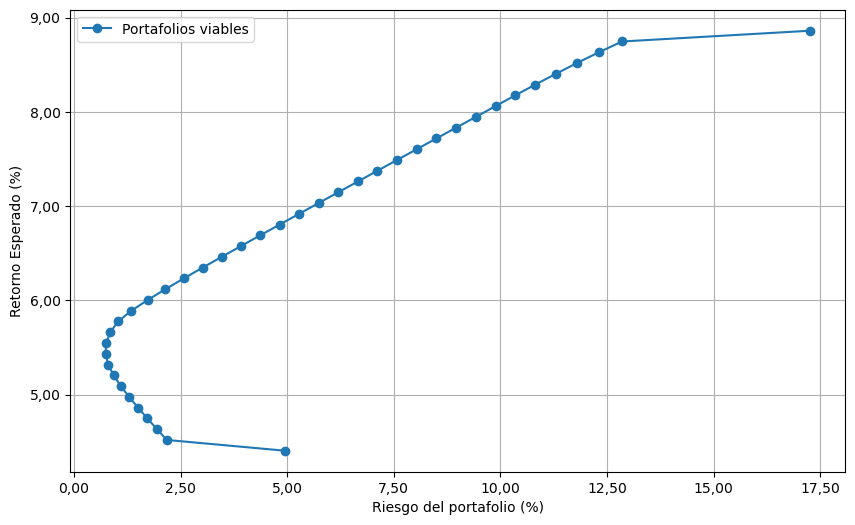

In [545]:
# Definir la función para calcular el rendimiento y riesgo del portafolio
def portfolio_performance(weights, mean_returns, cov_matrix):
    port_return = np.dot(weights, mean_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return port_return, port_volatility

# Definir la función de utilidad del inversor
def investor_utility(weights, mean_returns, cov_matrix, risk_aversion):
    port_return, port_volatility = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(port_return - 0.5 * risk_aversion * (port_volatility**2))  # Negativo para maximización

# Definir el coeficiente de aversión al riesgo
risk_aversion = 3  # Ajustable según el perfil del inversor

# Restricciones y condiciones iniciales
utility_constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]  # Suma de pesos = 1

# Encontrar el portafolio óptimo basado en la utilidad del inversor
initial_weights = np.array([1. / num_assets] * num_assets)  # Pesos iniciales equitativos
optimal_utility_results = sco.minimize(
    investor_utility, initial_weights,
    args=(asset_expected_returns, asset_cov_matrix, risk_aversion),
    method='SLSQP', bounds=bounds, constraints=utility_constraints
)

# Extraer retorno y volatilidad del portafolio óptimo basado en utilidad
optimal_utility_return, optimal_utility_std_dev = portfolio_performance(
    optimal_utility_results.x, asset_expected_returns, asset_cov_matrix
)

# Graficar la frontera eficiente con el portafolio óptimo basado en utilidad
plt.figure(figsize=(10, 6))
plt.plot(df_mean_variance_analysis_weights["Portfolio Risk"] * 100, df_mean_variance_analysis_weights["Target Return"] * 100, 
         marker='o', linestyle='-', label="Portafolios viables")

plt.xlabel("Riesgo del portafolio (%)")
plt.ylabel("Retorno Esperado (%)")
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.2f}".replace('.', ',')))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.2f}".replace('.', ',')))

plt.legend()
plt.grid(True)
plt.show()


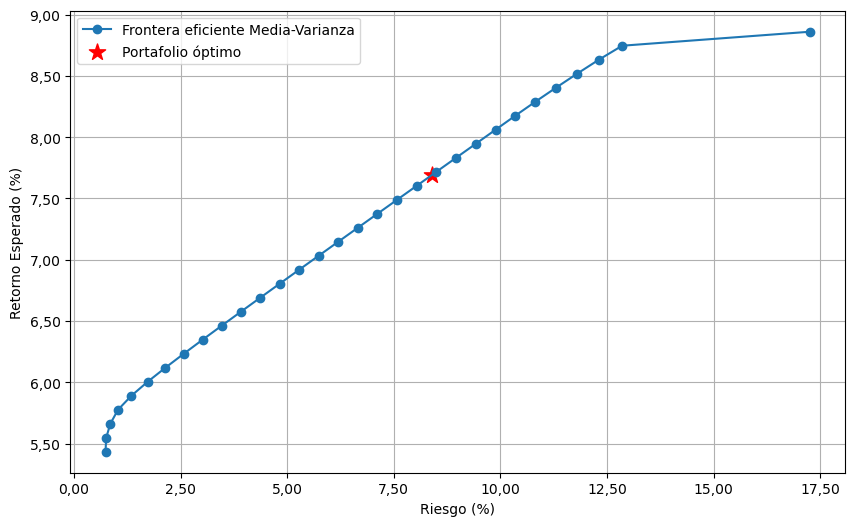

In [546]:
# Encontrar el punto mínimo de la frontera eficiente (vértice de la parábola)
min_risk_index = df_mean_variance_analysis_weights["Portfolio Risk"].idxmin()

# Filtrar los datos manteniendo solo los puntos por encima del vértice
df_filtered_mean_variance = df_mean_variance_analysis_weights.loc[min_risk_index:].reset_index(drop=True)

# Graficar la frontera eficiente con puntos filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_filtered_mean_variance["Portfolio Risk"]*100, df_filtered_mean_variance["Target Return"] * 100, 
         marker='o', linestyle='-', label="Frontera eficiente Media-Varianza")

# Marcar portafolio óptimo basado en utilidad
plt.scatter(optimal_utility_std_dev * 100, optimal_utility_return * 100, 
            color='red', marker='*', s=150, label="Portafolio óptimo")

plt.xlabel("Riesgo (%)")
plt.ylabel("Retorno Esperado (%)")
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.2f}".replace('.', ',')))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.2f}".replace('.', ',')))

plt.legend()
plt.grid(True)
plt.show()


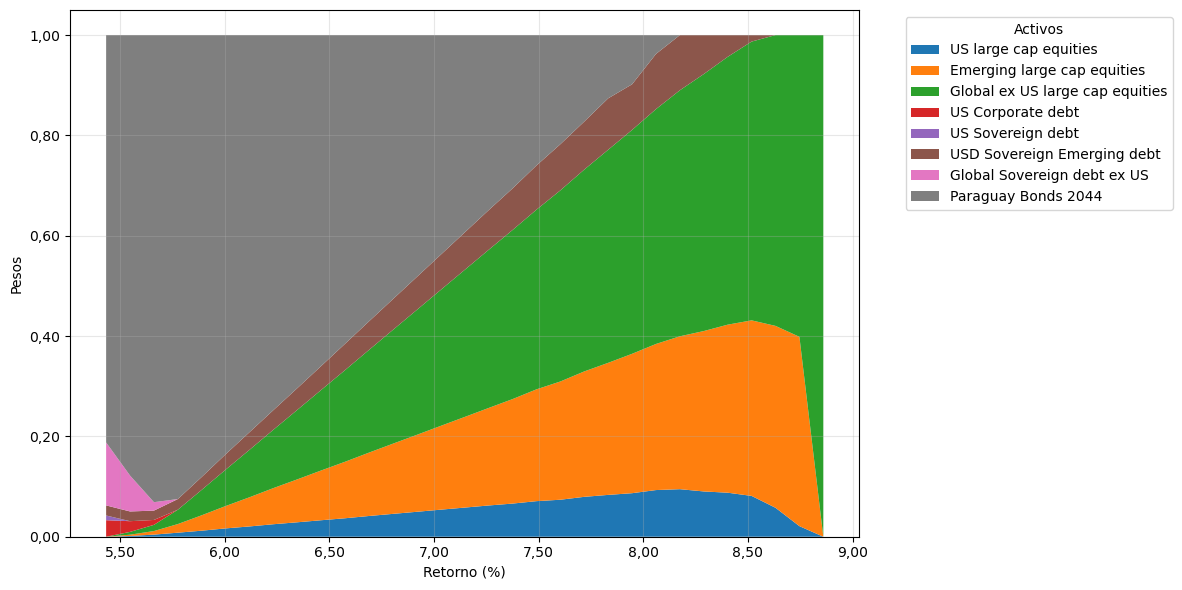

In [541]:
# Gráfico de área de los pesos óptimos del análisis media-varianza
x_mv = df_filtered_mean_variance['Target Return'].values.astype(float) * 100
y_mv = df_filtered_mean_variance[weights_columns].values.astype(float).T

plt.figure(figsize=(12, 6))
plt.stackplot(x_mv, y_mv, labels=[col.replace('Weight_', '') for col in weights_columns])

plt.xlabel('Retorno (%)')
plt.ylabel('Pesos')
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.2f}".replace('.', ',')))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.2f}".replace('.', ',')))

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Activos")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



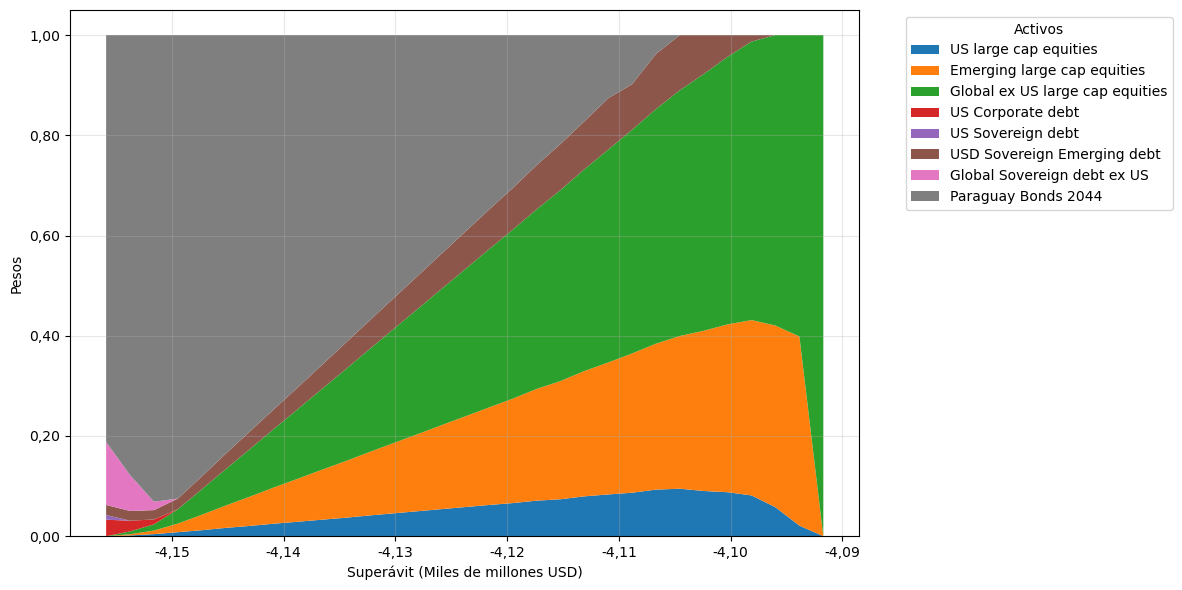

In [542]:
# Calcular el superávit (t+1) para cada punto en la frontera eficiente de media-varianza
df_filtered_mean_variance["Liability (t+1)"] = L0 * (1 + liability_return)
df_filtered_mean_variance["Surplus (t+1)"] = df_filtered_mean_variance["Asset (t+1)"] - df_filtered_mean_variance["Liability (t+1)"]

# Gráfico de área de los pesos óptimos del análisis media-varianza
x_mv_surplus = df_filtered_mean_variance['Surplus (t+1)'].values.astype(float)
y_mv = df_filtered_mean_variance[weights_columns].values.astype(float).T

plt.figure(figsize=(12, 6))
plt.stackplot(x_mv_surplus, y_mv, labels=[col.replace('Weight_', '') for col in weights_columns])

plt.xlabel('Superávit (Miles de millones USD)')
plt.ylabel('Pesos')
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.2f}".replace('.', ',')))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.2f}".replace('.', ',')))

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Activos")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

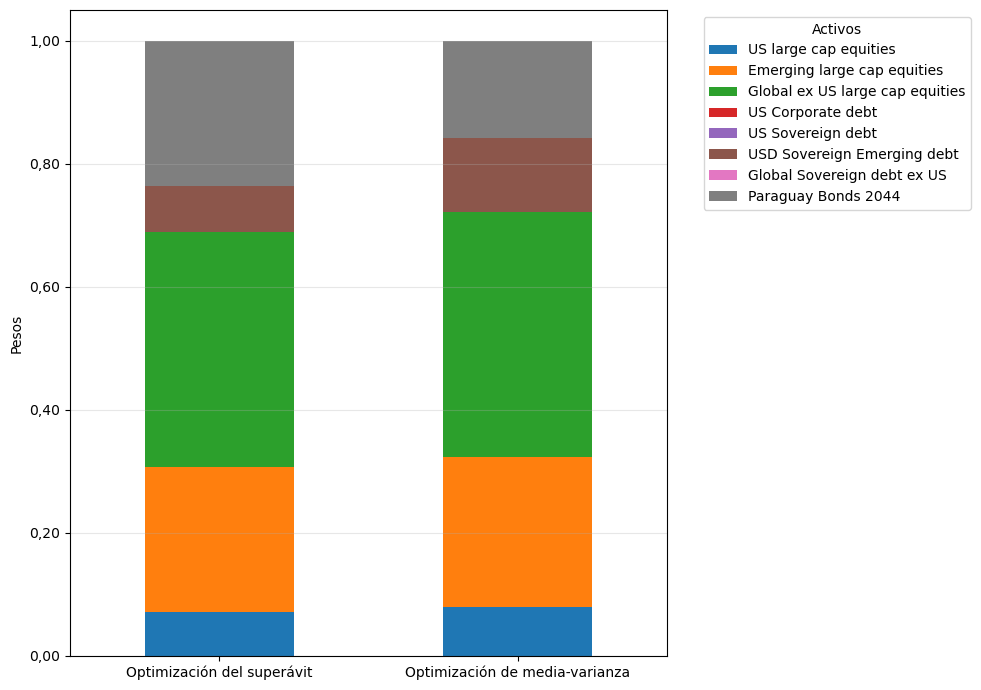

In [548]:
# Extraer los pesos del portafolio óptimo de surplus y media-varianza
optimal_surplus_weights = optimal_surplus_portfolio[weights_columns].values.astype(float)
optimal_mv_weights = optimal_utility_results.x

fig, ax = plt.subplots(figsize=(10, 7))

# Crear DataFrame correctamente estructurado para barras apiladas
df_weights = pd.DataFrame({
    'Optimización del superávit': optimal_surplus_weights,
    'Optimización de media-varianza': optimal_mv_weights
}, index=asset_names).T

# Gráfico de barras apiladas
df_weights.plot(kind='bar', stacked=True, ax=ax)

# Configuración del gráfico
ax.set_ylabel('Pesos')
# ax.set_title('Optimal Portfolio Weights by Asset: Surplus vs. Mean-Variance')
ax.legend(title='Activos', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.2f}".replace('.', ',')))

plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


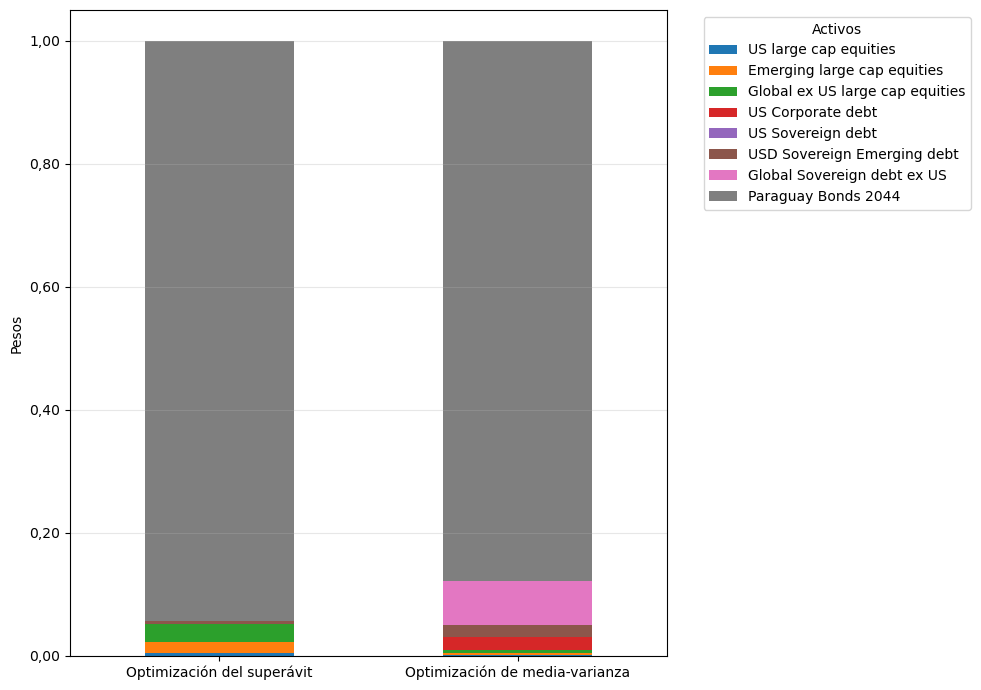

In [524]:
#Comparación de Portafolios Óptimos: Superávit vs. Media-Varianza'

# Extraer los pesos del portafolio óptimo de surplus y media-varianza
min_surplus_weights = df_filtered_surplus_analysis[weights_columns].loc[1].values
min_mv_weights = df_filtered_mean_variance[weights_columns].loc[1].values

# Crear DataFrame con la composición de los portafolios óptimos
df_weights_comparison = pd.DataFrame({
    'Optimización del superávit': min_surplus_weights,
    'Optimización de media-varianza': min_mv_weights
}, index=asset_names).T

# Graficar comparación de pesos en los portafolios óptimos
fig, ax = plt.subplots(figsize=(10, 7))

df_weights_comparison.plot(kind='bar', stacked=True, ax=ax)

ax.set_ylabel('Pesos')
ax.legend(title='Activos', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.2f}".replace('.', ',')))

plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
